# Simulate single-cell RNAseq data

Mamie Wang 03/29/2020

Goal:
- Use `splatter` to estimate parameters from real single-cell RNAseq to simulate new data for benchmarking purpose. 

## Installation and load real data for simulation

In [1]:
suppressPackageStartupMessages({
  library(scater)
  library(splatter)
  library(SingleCellExperiment) # BioConductor
  library(DropletUtils) # BioConductor
})

In [14]:
# load the mouse pancreas dataset *https://hemberg-lab.github.io/scRNA.seq.datasets/mouse/hsc/
sce <- readRDS("../data/sce/baron-mouse.rds")

In [15]:
sce

class: SingleCellExperiment 
dim: 14878 1886 
metadata(0):
assays(2): counts logcounts
rownames(14878): X0610007P14Rik X0610009B22Rik ... Zzz3 l7Rn6
rowData names(10): feature_symbol is_feature_control ... total_counts
  log10_total_counts
colnames(1886): mouse1_lib1.final_cell_0001 mouse1_lib1.final_cell_0002
  ... mouse2_lib3.final_cell_0394 mouse2_lib3.final_cell_0395
colData names(30): mouse cell_type1 ... pct_counts_ERCC is_cell_control
reducedDimNames(0):
spikeNames(1): ERCC
altExpNames(0):

Warning message:
“call 'runPCA' explicitly to compute results”

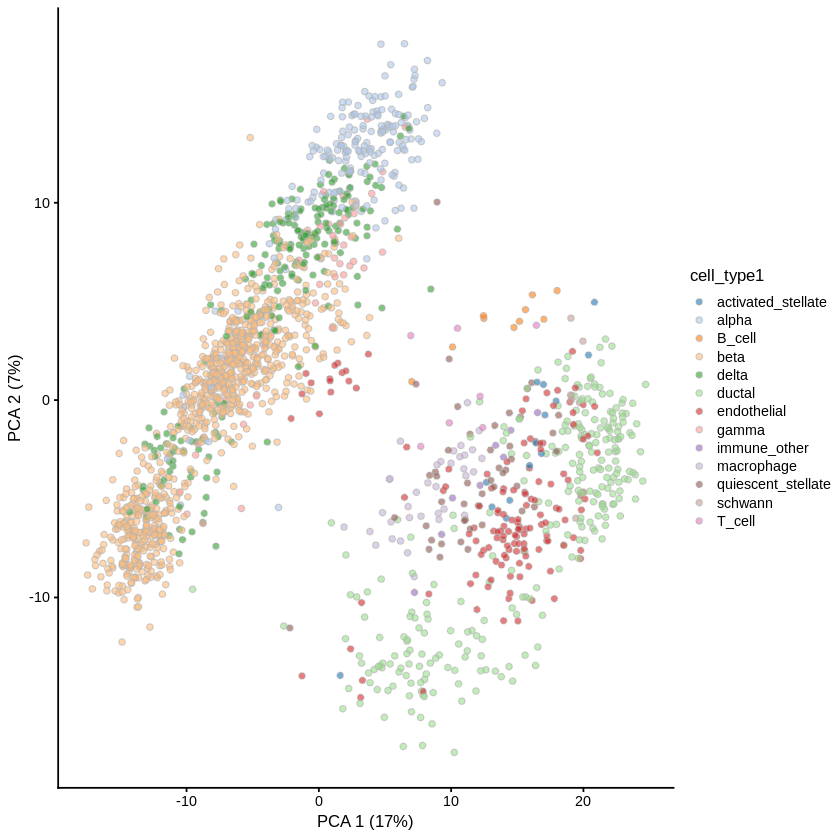

In [33]:
plotPCA(sce, colour_by = "cell_type1")

In [34]:
sort(table(colData(sce)$cell_type1))


           schwann             T_cell       immune_other             B_cell 
                 6                  7                  8                 10 
activated_stellate         macrophage              gamma quiescent_stellate 
                14                 36                 41                 47 
       endothelial              alpha              delta             ductal 
               139                191                218                275 
              beta 
               894 

In [18]:
params <- splatEstimate(sce)
params

A Params object of class SplatParams 
Parameters can be (estimable) or [not estimable], 'Default' or  'NOT DEFAULT' 
Secondary parameters are usually set during simulation

Global: 
(GENES)  (CELLS)   [Seed] 
  14878     1886   427253 

28 additional parameters 

Batches: 
    [BATCHES]  [BATCH CELLS]     [Location]        [Scale] 
            1           1886            0.1            0.1 

Mean: 
           (RATE)            (SHAPE) 
 3.92778377496915  0.567190114610867 

Library size: 
       (LOCATION)            (SCALE)             (Norm) 
 8.32084512908781  0.635417267466655              FALSE 

Exprs outliers: 
      (PROBABILITY)           (LOCATION)              (SCALE) 
0.00983050847457627     4.25853728600568    0.830031438867319 

Groups: 
     [Groups]  [Group Probs] 
            1              1 

Diff expr: 
[Probability]    [Down Prob]     [Location]        [Scale] 
          0.1            0.5            0.1            0.4 

BCV: 
    (COMMON DISP)              (DOF) 


In [45]:
sim <- splatSimulate(params)

Getting parameters...
Creating simulation object...
Simulating library sizes...
Simulating gene means...
Simulating BCV...
Simulating counts...
Simulating dropout (if needed)...
Done!


In [44]:
dim(assays(sim)$TrueCounts)

[1] 14878  1886

In [47]:
sim <- logNormCounts(sim)
sim <- runPCA(sim)

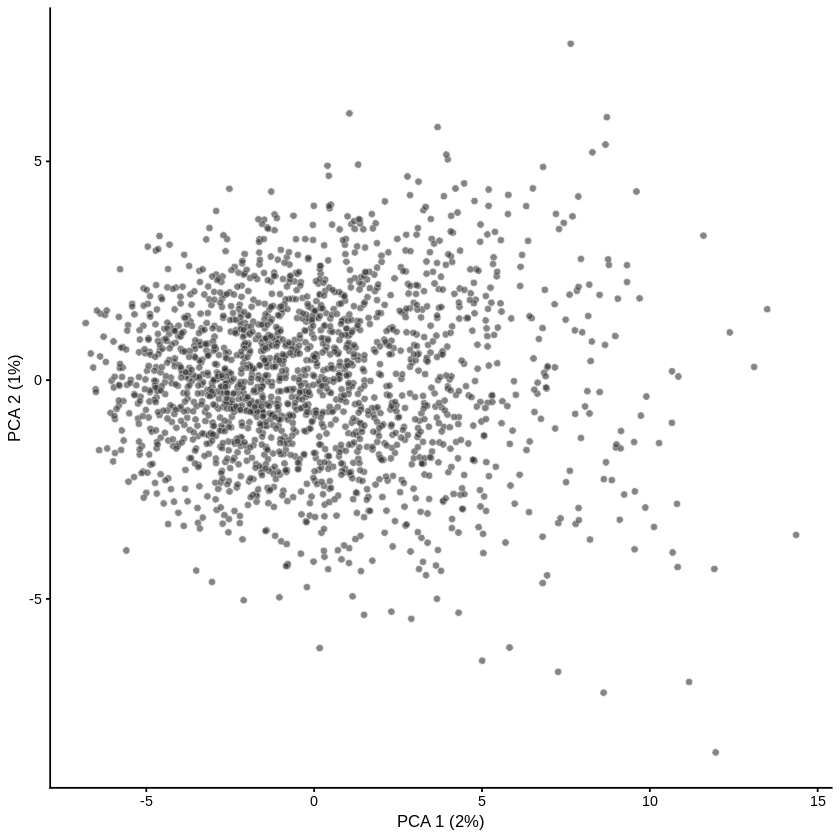

In [54]:
plotPCA(sim)

## Simulation based on bulk RNAseq data

In [4]:
source("/gpfs/ysm/project/kleinstein/mw957/repos/ALRA-paper/alra_ImmGen_funs.R")

In [1]:
# https://github.com/KlugerLab/ALRA-paper
set.seed(3)
load("/gpfs/ysm/project/kleinstein/mw957/repos/ALRA-paper/data/ImmGen_bulk.RData")

# estimate the multinomial distribution prob vector for the 9 cell types
bulkProb <- sweep(bulkCount, MARGIN = 2, STATS = colSums(bulkCount), FUN = "/") 

In [16]:
head(bulkCount)

,SRR1976543,SRR1976571,SRR1976589,SRR1976590,SRR1976591,SRR1976592,SRR1976593,SRR1976594,SRR1976596
0610005C13Rik,13,0,4,0,0,8,4,0,2
0610007N19Rik,1,1,0,0,0,0,119,0,0
0610007P14Rik,513,32,874,512,785,1297,1292,215,278
0610009B14Rik,2,0,0,2,0,3,0,0,0
0610009B22Rik,144,127,120,59,73,134,156,44,35
0610009D07Rik,1020,921,2861,1475,1693,3363,2668,732,756


In [8]:
head(bulkProb)

,SRR1976543,SRR1976571,SRR1976589,SRR1976590,SRR1976591,SRR1976592,SRR1976593,SRR1976594,SRR1976596
0610005C13Rik,6.262319e-07,0.000000e+00,1.490391e-07,0.000000e+00,0.000000e+00,2.059751e-07,1.340187e-07,0.000000e+00,1.291284e-07
0610007N19Rik,4.817169e-08,4.284332e-08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.987057e-06,0.000000e+00,0.000000e+00
0610007P14Rik,2.471208e-05,1.370986e-06,3.256503e-05,2.908862e-05,3.497886e-05,3.339371e-05,4.328805e-05,2.230653e-05,1.794885e-05
0610009B14Rik,9.634337e-08,0.000000e+00,0.000000e+00,1.136274e-07,0.000000e+00,7.724065e-08,0.000000e+00,0.000000e+00,0.000000e+00
0610009B22Rik,6.936723e-06,5.441102e-06,4.471172e-06,3.352008e-06,3.252811e-06,3.450082e-06,5.226731e-06,4.565057e-06,2.259747e-06
0610009D07Rik,4.913512e-05,3.945870e-05,1.066002e-04,8.380021e-05,7.543848e-05,8.658677e-05,8.939050e-05,7.594596e-05,4.881053e-05


In [9]:
load("/gpfs/ysm/project/kleinstein/mw957/repos/ALRA-paper/data/PBMC_lib_size.RData")

# subsample from PBMC library size
simCellSize <- sample(PBMC_lib_size, size = nCell, replace = F)

In [10]:
# simulation data init
nCell <- 9000
nGene <- nrow(bulkCount)

# simulation data matrix
simCount <- matrix(0, nrow = nGene, ncol = nCell)

# simulate cell type 
cellType <- sample(bulkType, size = nCell, replace = T)
table(cellType)


# get count from multinomial distribution
for(i in 1:nCell){
  simCount[,i] <- rmultinom(n = 1, size = simCellSize[i], prob = bulkProb[,which(bulkType == cellType[i])])
}

sum(colSums(simCount) >= 1000)

rownames(simCount) <- rownames(bulkCount)
colnames(simCount) <- paste("Cell", seq(1:nCell), sep = "_")

simCount <- simCount[rowSums(simCount) > 0,] # remove genes that are not expressed by any cell

cellType
        B.Cell CD4.TConv.Cell     CD8.T.Cell Dendritic.Cell       gdT.Cell 
          1025            992            979           1031            976 
    Neutrophil        NK.Cell       NKT.Cell           Treg 
           991           1017           1047            942 

[1] 7597

In [11]:
mean(simCount == 0) # 0.936827

# normalize data
realCellIdx <- sample(which(colSums(simCount) >= 1000), size = 5000, replace = F) # sample 5000 cells with read count >= 10^3
mean(simCount[,realCellIdx] == 0) # 0.9319565
simNorm <- log(normbycol(simCount[rowSums(simCount[,realCellIdx]) != 0,realCellIdx], 10000) + 1)

[1] 0.937149

[1] 0.9322748